# FIFA 23 Ultimate Team Players Analysis

<p align="center">
  <img src="https://assetsio.reedpopcdn.com/fifa-23_hosNHHp.jpg?width=1200&height=1200&fit=bounds&quality=70&format=jpg&auto=webp" width = 100%>
</p>

## Table of Contents

1. Define the Problem
2. [Data Collection](#Data-Collection)
3. [Loading and Understanding the Dataset](#Loading-and-Understanding-the-Dataset)
4. [Exploratory Data Analysis (EDA) with Seaborn](#Exploratory-Data-Analysis-(EDA)-with-Seaborn)
5. [Advanced Visualization Techniques](#Advanced-Visualization-Techniques)
6. [Conclusion](#Conclusion)

## 1. Define the Problem 
Understanding the dataset and defining the problem is the foundation for a successful project.

Problem Statement:
Analyze the FIFA 23 Ultimate Team dataset from FUTBIN to derive insights about players' performance metrics, their market value, and other characteristics. The goal is to understand the driving factors behind a player's popularity, market value, and performance.

#### Hypothetical Questions:

1. How does a player's rating correlate with their market price?
2. Does the league or club a player is associated with influence their market price?
3. Do players with certain run styles have a higher popularity rating?
4. Are there any trends between a player's skill/weak foot stars and their overall rating?
5. How does the body type of a player influence their performance metrics?
6. Which card version (Rare Gold, ICON, Common Gold) is most popular among players?
7. How do goalkeepers' stats differ from outfield players? Are their market values different?
8. Does a player's attack and defense workrate have an impact on their market price or popularity?
9. Which clubs have the highest average player ratings?
10. Are players from certain nations more skilled (based on the Skills_Star column)?
11. How does the player's position relate to their market price?
12. Are players with a higher attack work rate more popular among the community?
13. Do players with better dribbling skills also tend to have better shooting skills?
14. How does a player's body type or physicality relate to their performance in the game (e.g., pace, shooting)?
15. Which leagues have the most valuable players based on the market price?


## 2. Data Understanding

- Import the necessary libraries
- Load the dataset and understand its structure.
- Check for any missing values.
- Generate descriptive statistics to get an understanding of each feature.

In [6]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

import folium as fl
import time

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Load dataset
file_path = "https://raw.githubusercontent.com/diogo-costa-silva/assets/main/data/fifa23_players_2023-08-25.csv"
players = pd.read_csv(file_path)

In [8]:
# First and last 5 players of the dataset
players

,Name,Club,Nation,League,Rating,Main_Position,Alternate_Positions,Card_Version,Run_Style,Price,...,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defense / Speed,Physical / Positioning,Height,BodyType,Popularity,Base_Stats,Ingame_Stats
0,Pelé,FUT ICONS,Brazil,Icons,99,LW,"RM,LM,RW",Shapeshifters ICON,Explosive,2570000.0,...,97,94,99,61,78,"173cm | 5'8""",Unique (70kg),2639,525,2557
1,Kevin De Bruyne,Manchester City,Belgium,Premier League,99,CM,CAM,Level Up Obj,Controlled,0.0,...,95,99,97,91,99,"181cm | 5'11""",Unique (70kg),684,569,2743
2,Cristiano Ronaldo,Al Nassr,Portugal,MBS Pro League (SAU 1),99,ST,"CF,LW",Futties Premium,Controlled,0.0,...,99,93,97,41,88,"187cm | 6'2""",CR7 (83kg),3130,515,2499
3,Lionel Messi,Inter Miami CF,Argentina,Major League Soccer,99,ST,"RM,RW",Futties Premium,Controlled,11990000.0,...,98,99,99,41,81,"169cm | 5'7""",Messi (67kg),1928,513,2506
4,Neymar Jr,Paris SG,Brazil,Ligue 1,99,CAM,"LM,LW",Futties,Explosive,5300000.0,...,96,95,99,50,78,"175cm | 5'9""",Neymar (68kg),911,517,2531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7286,Singh,Jamshedpur FC,India,Indian Super League (IND 1),46,RM,RW,Normal,Controlled,0.0,...,42,40,47,25,50,"172cm | 5'8""",Lean (71kg),18,272,1240
7287,Nathan Logue,Finn Harps,Republic of Ireland,SSE Airtricity League (IRL 1),46,CM,0,Normal,Controlled,1200.0,...,37,45,48,41,49,"178cm | 5'10""",Lean (72kg),15,270,1285
7288,Devansh Dabas,Chennaiyin FC,India,Indian Super League (IND 1),46,GK,0,Normal,Controlled,4800.0,...,42,47,48,28,51,"182cm | 6'0""",Average (80kg),30,261,627
7289,Biswa Darjee,Bengaluru FC,India,Indian Super League (IND 1),46,CM,CAM,Normal,Controlled,300.0,...,39,45,47,41,57,"170cm | 5'7""",Short & Lean- (65kg),6,295,1377


In [9]:
# columns list
players.columns

Index(['Name', 'Club', 'Nation', 'League', 'Rating', 'Main_Position',
       'Alternate_Positions', 'Card_Version', 'Run_Style', 'Price',
       'Price_Variation', 'Skills_Star', 'Weak_Foot_Star', 'Attack_Workrate',
       'Defense_Workrate', 'Pace / Diving', 'Shooting / Handling',
       'Passing / Kicking', 'Dribbling / Reflexes', 'Defense / Speed',
       'Physical / Positioning', 'Height', 'BodyType', 'Popularity',
       'Base_Stats', 'Ingame_Stats'],
      dtype='object')

In [10]:
data_types = players.info()
data_types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7291 entries, 0 to 7290
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    7291 non-null   object 
 1   Club                    7291 non-null   object 
 2   Nation                  7291 non-null   object 
 3   League                  7291 non-null   object 
 4   Rating                  7291 non-null   int64  
 5   Main_Position           7291 non-null   object 
 6   Alternate_Positions     7291 non-null   object 
 7   Card_Version            7291 non-null   object 
 8   Run_Style               7291 non-null   object 
 9   Price                   7291 non-null   float64
 10  Price_Variation         7291 non-null   object 
 11  Skills_Star             7291 non-null   int64  
 12  Weak_Foot_Star          7291 non-null   int64  
 13  Attack_Workrate         7291 non-null   object 
 14  Defense_Workrate        7291 non-null   

In [11]:
data_shape = players.shape
data_shape

(7291, 26)

In [12]:
# Check for missing values in each column
missing_values = players.isnull().sum()
missing_values

Name                      0
Club                      0
Nation                    0
League                    0
Rating                    0
Main_Position             0
Alternate_Positions       0
Card_Version              0
Run_Style                 0
Price                     0
Price_Variation           0
Skills_Star               0
Weak_Foot_Star            0
Attack_Workrate           0
Defense_Workrate          0
Pace / Diving             0
Shooting / Handling       0
Passing / Kicking         0
Dribbling / Reflexes      0
Defense / Speed           0
Physical / Positioning    0
Height                    0
BodyType                  0
Popularity                0
Base_Stats                0
Ingame_Stats              0
dtype: int64

In [13]:
# Checking the number of unique values in each column
unique_values = players.nunique()
unique_values

Name                      6500
Club                       678
Nation                     139
League                      48
Rating                      54
Main_Position               15
Alternate_Positions        197
Card_Version               157
Run_Style                    3
Price                      411
Price_Variation            383
Skills_Star                  6
Weak_Foot_Star               6
Attack_Workrate              3
Defense_Workrate             3
Pace / Diving               71
Shooting / Handling         81
Passing / Kicking           74
Dribbling / Reflexes        71
Defense / Speed             83
Physical / Positioning      67
Height                      47
BodyType                   297
Popularity                 813
Base_Stats                 311
Ingame_Stats              1641
dtype: int64

In [14]:
players.duplicated().sum()

0

#### Data Understanding Summary:

Shape of the Dataset:
- Rows: 7,291
- Columns: 26

Data Types:
- The dataset contains a mix of data types, including objects (strings), integers, and floats.
- There are some variables that seem to have a different data type than expected:
  - `Price_Variation` is object but it should be int or float.
  - `Pace / Diving` is float but the rest of the stats columns are int.
  - `Height` is object.

Missing Values:
- There are no missing values in any of the columns.



In [15]:
# Extracting detailed information on the specified columns
price_variation_info = players["Price_Variation"].unique()
pace_diving_info = players["Pace / Diving"].unique()
height_info = players["Height"].unique()
bodytype_info = players["BodyType"].unique()

price_variation_info[:10], pace_diving_info[:10], height_info[:10], bodytype_info[:10]

(array(['3.13%', '0', '62.03%', '3.93%', '2.18%', '5.46%', '1.33%',
        '4.61%', '0.71%', '4.32%'], dtype=object),
 array([96., 88., 97., 95., 99., 92., 93., 90., 94., 87.]),
 array(['173cm | 5\'8"', '181cm | 5\'11"', '187cm | 6\'2"',
        '169cm | 5\'7"', '175cm | 5\'9"', '182cm | 6\'0"', '185cm | 6\'1"',
        '186cm | 6\'1"', '183cm | 6\'0"', '172cm | 5\'8"'], dtype=object),
 array(['Unique  (70kg)', 'CR7  (83kg)', 'Messi  (67kg)', 'Neymar  (68kg)',
        'Unique  (73kg)', 'Average  (77kg)', 'Average  (81kg)',
        'High & Average+  (75kg)', 'Lean  (70kg)', 'Unique  (81kg)'],
       dtype=object))

Based on the detailed analysis of the specified columns:

`Price_Variation`:

This column contains percentage values represented as strings (e.g., '3.13%'). We need to convert these into numeric format for further analysis.

`Pace / Diving`:

The values in this column are floats and range from 87 to 99 for the first ten values we've observed.

`Height`:

This column contains height in two formats: centimeters (e.g., '173cm') and feet-inches (e.g., '5'8"'). To standardize this, we can split this into two separate columns.

`BodyType`:

With 297 unique values, this column seems to contain specific descriptions based on the player's height and weight (e.g., 'Average (75kg)'). We can see that there are categories like 'Average (75kg)', 'Average (70kg)', etc. We need to decide how we want to handle this column, whether we want to extract only the general body type (like 'Average' or 'Lean') or also consider the weight.

## 3. Data Pre-processing:

- Handle missing values.
- Convert categorical features if needed.
- Resolve any inconsistencies in the data.
  
To proceed with data cleaning, we'll:

1. Convert Price_Variation to numeric by removing the '%' sign.
2. Decide on a consistent metric for the Height column and implement it.
3. Extract general body types from the BodyType column.

In [16]:
# Rename the columns
columns_to_rename = {
    "Pace / Diving": "Pace_Diving",
    "Shooting / Handling": "Shooting_Handling",
    "Passing / Kicking": "Passing_Kicking",
    "Dribbling / Reflexes": "Dribbling_Reflexes",
    "Defense / Speed": "Defense_Speed",
    "Physical / Positioning": "Physical_Positioning"
}

players.rename(columns=columns_to_rename, inplace=True)



# Convert Pace_Diving to integer
players['Pace_Diving'] = players['Pace_Diving'].astype(int)


# Convert Price_Variation to numeric by removing the '%' sign and converting to float
players["Price_Variation"] = players["Price_Variation"].str.replace('%', '').astype(float)



# Split the Height column
players['Height_cm'] = players['Height'].str.split('|').str[0].str.strip().str.rstrip('cm').astype(int)
players['Height_ft'] = players['Height'].str.split('|').str[1].str.strip()


# Extract weight from BodyType and create a new column
players['Weight_kg'] = players['BodyType'].str.extract(r'(\d+)kg').astype(float)

# Clean up the BodyType column by removing the weight and non-relevant values
players['BodyType'] = players['BodyType'].str.split(' ').str[0]


Here's the result of our data cleaning for the specified columns:

Price_Variation:
- The '%' sign has been removed, and the column has been converted to a float data type.

Height_cm:
- We've created a new column Height_cm that represents the height of players in centimeters.

Height_inches:
- We've created a new column that represents the height of players in inches.

Weight_kg:
- We've extracted the weight from the original BodyType column and stored it in this new column.

BodyType:
- This column now only contains the general descriptor of the body type. However, we still have unique identifiers like "Unique", "CR7", "Messi", and "Neymar". 

Let's see which is the best approch, if these can be grouped into a generic category or handled separately.

In [17]:
# Display the value counts of the modified BodyType column
bodytype_counts = players["BodyType"].value_counts()

bodytype_counts

High        2581
Average     2383
Lean        1489
Short        379
Stocky       227
Unique       203
Normal        12
CR7            4
Messi          4
Neymar         3
R9             2
Shaqiri        2
Base           1
Courtois       1
Name: BodyType, dtype: int64

In [14]:

non_relevant_values = ["CR7", "Messi", "Neymar", "R9", "Shaqiri", "Courtois"]
players.loc[players['BodyType'].isin(non_relevant_values), 'BodyType'] = 'Unique'

# Display the value counts of the modified BodyType column
bodytype_counts = players["BodyType"].value_counts()

bodytype_counts

High       2581
Average    2383
Lean       1489
Short       379
Stocky      227
Unique      219
Normal       12
Base          1
Name: BodyType, dtype: int64

### Data Quality Check

Now that we made some pre-processing to the dataset, we can proceed to the next step of our data exploration: <b>generating descriptive statistics</b>. 
This will give us a comprehensive understanding of the distribution and characteristics of each feature. Let's examine the statistics for numerical columns in the dataset.

In [15]:
# Check for missing values
missing_values = players.isnull().sum()
missing_values

Name                     0
Club                     0
Nation                   0
League                   0
Rating                   0
Main_Position            0
Alternate_Positions      0
Card_Version             0
Run_Style                0
Price                    0
Price_Variation          0
Skills_Star              0
Weak_Foot_Star           0
Attack_Workrate          0
Defense_Workrate         0
Pace_Diving              0
Shooting_Handling        0
Passing_Kicking          0
Dribbling_Reflexes       0
Defense_Speed            0
Physical_Positioning     0
Height                   0
BodyType                 0
Popularity               0
Base_Stats               0
Ingame_Stats             0
Height_cm                0
Height_ft                0
Weight_kg               12
dtype: int64

In [16]:
# Generating descriptive statistics for numerical columns
numerical_stats = players.describe()
numerical_stats

,Rating,Price,Price_Variation,Skills_Star,Weak_Foot_Star,Pace_Diving,Shooting_Handling,Passing_Kicking,Dribbling_Reflexes,Defense_Speed,Physical_Positioning,Popularity,Base_Stats,Ingame_Stats,Height_cm,Weight_kg
count,7291.000000,7.291000e+03,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7279.000000
mean,69.508984,1.322194e+04,3.271547,2.083802,3.045261,70.815115,57.679879,61.754355,66.799342,52.870662,67.844877,109.099575,377.765464,1680.697984,181.830887,75.417365
std,9.666299,1.998951e+05,13.723417,1.398794,0.746190,12.192583,15.935866,12.195375,11.669367,17.576293,10.621687,593.091606,54.783929,400.322290,6.842561,7.366025
min,46.000000,0.000000e+00,0.000000,0.000000,0.000000,28.000000,18.000000,26.000000,29.000000,15.000000,30.000000,-8851.000000,242.000000,536.000000,156.000000,0.000000
25%,63.000000,3.000000e+02,0.000000,0.000000,3.000000,64.000000,47.000000,54.000000,60.000000,38.000000,61.000000,0.000000,340.000000,1517.000000,177.000000,70.000000
50%,68.000000,4.000000e+02,0.000000,2.000000,3.000000,71.000000,59.000000,61.000000,66.000000,56.000000,68.000000,2.000000,371.000000,1712.000000,182.000000,75.000000
75%,75.000000,1.200000e+03,2.000000,3.000000,3.000000,79.000000,68.000000,69.000000,74.000000,66.000000,75.000000,8.000000,408.000000,1906.000000,187.000000,80.000000
max,99.000000,1.199000e+07,488.240000,5.000000,5.000000,99.000000,99.000000,99.000000,99.000000,98.000000,99.000000,21348.000000,569.000000,2752.000000,206.000000,105.000000


The descriptive statistics provide an overview of the distribution of values in numeric columns. Some observations:

- The "Rating" column varies from 46 to 99, which is expected.
- There's a wide range in the "Price" column, indicating that some players are much more valuable than others.
- The "Price_Variation" column has a max value of 488.24, which seems to be a significant price change.
- The "Skills_Star" and "Weak_Foot_Star" columns range from 0 to 5, which is expected.
- The "Popularity" column has a negative minimum value (-8851). This could indicate a high number of dislikes relative to likes.
- The minimum value for "Weight_kg" is 0, which is clearly an error.


#### Missing Values in "Weight_kg" Column

In [17]:
# Display rows with missing values in "Weight_kg" column
players_missing_weight = players[players["Weight_kg"].isnull()]
players_missing_weight


,Name,Club,Nation,League,Rating,Main_Position,Alternate_Positions,Card_Version,Run_Style,Price,...,Defense_Speed,Physical_Positioning,Height,BodyType,Popularity,Base_Stats,Ingame_Stats,Height_cm,Height_ft,Weight_kg
70,Müller,FUT ICONS,Germany,Icons,94,ST,CF,Icon,Controlled,71000.0,...,43,76,"176cm | 5'9""",Normal,1053,466,2287,176,"5'9""",NaN
358,Ledley King,HERO,England,Premier League,89,CB,0,Fantasy Hero,Lengthy,21000.0,...,92,86,"188cm | 6'2""",Normal,937,469,2186,188,"6'2""",NaN
718,Lucas Ocampos,Sevilla FC,Argentina,LaLiga Santander,85,LW,"LM,RW",MOTM,Controlled,29500.0,...,67,87,"188cm | 6'2""",Normal,21,493,2350,188,"6'2""",NaN
954,Lucas Ocampos,Ajax,Argentina,Eredivisie,81,LW,"LM,RW",Normal,Controlled,4400.0,...,62,83,"188cm | 6'2""",Normal,20,465,2216,188,"6'2""",NaN
1111,Martin Dúbravka,Newcastle Utd,Slovakia,Premier League,80,GK,0,non-rare,Controlled,2900.0,...,46,77,"190cm | 6'3""",Normal,15,437,1002,190,"6'3""",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,Naatan Skyttä,Toulouse FC,Finland,Ligue 1,65,CAM,0,non-rare,Controlled,0.0,...,43,47,"170cm | 5'7""",Normal,3,341,1621,170,"5'7""",NaN
6424,Armstrong Okoflex,West Ham,Republic of Ireland,Premier League,60,LM,"ST,LW",non-rare,Controlled,2900.0,...,25,53,"186cm | 6'1""",Normal,3,329,1516,186,"6'1""",NaN
6596,Mamadou Camara,RC Lens,Senegal,Ligue 1,59,CM,0,non-rare,Controlled,300.0,...,52,50,"185cm | 6'1""",Normal,1,313,1461,185,"6'1""",NaN
6599,Chinonso Offor,Impact Montréal,Nigeria,Major League Soccer,59,ST,"LM,CF",non-rare,Lengthy,300.0,...,33,68,"191cm | 6'3""",Normal,-1,333,1480,191,"6'3""",NaN


Upon inspecting the rows with missing values in the "Weight_kg" column, we can observe a few patterns:

Most players with missing weight values have unique names, but there are duplicates, such as "Lucas Ocampos", who appears twice.
The "BodyType" for these players varies, but most are labeled as "Normal".
Their heights vary, and there doesn't seem to be an obvious pattern that would help us impute their weights based on height alone.
To address the missing weights, we have a few options:

- Median Imputation: Use the median weight of all players as the imputation value.
- Mode Imputation by BodyType: Use the mode (most common) weight for each body type to impute missing values.
- Drop Rows: Remove the rows with missing weight values. This may not be ideal since there are a few rows with unique player names.
- Manual Imputation: If there are well-known players with missing weight values, their weights could be manually searched for and filled in.

Given the number of missing values is relatively small (12 out of 7291 rows), any of these methods could be acceptable so I will choose the <b>Median Imputation</b>. 

In [18]:
# Impute missing values in "Weight_kg" column with median
median_weight = players["Weight_kg"].median()
players["Weight_kg"].fillna(median_weight, inplace=True)

# Check if there are any missing values left in "Weight_kg" column
remaining_missing_weight = players["Weight_kg"].isnull().sum()
remaining_missing_weight


0

The missing values in the "Weight_kg" column have been successfully imputed using the median weight.

#### 2. Negative Popularity

Now, let's explore the negative values in the "Popularity" column to understand the distribution and decide on an appropriate course of action.

In [19]:
# Extract rows with negative popularity values
negative_popularity = players[players["Popularity"] < 0]

# Display descriptive statistics for negative popularity values
negative_popularity_desc = negative_popularity["Popularity"].describe()
negative_popularity_desc


count     746.000000
mean      -94.530831
std       575.069576
min     -8851.000000
25%        -4.000000
50%        -1.000000
75%        -1.000000
max        -1.000000
Name: Popularity, dtype: float64

The descriptive statistics for negative popularity values are as follows:

- There are 746 players with negative popularity.
- The mean negative popularity is approximately -94.53.
- 50% (or the median) of these players have a popularity of -1.
- The minimum popularity is -8851, which is quite extreme.
- Given that popularity is the balance of likes and dislikes on FUTBIN, negative values might indicate players who have received more dislikes than likes. The values seem legitimate, especially considering that many players have a popularity of just -1.

There's no need to modify these values.


#### 3.3. Players with a Weight of 0 kg

Lastly, let's address the players with a weight of 0 kg, as this is unrealistic. We'll identify these players and decide on a course of action.

In [20]:
# Extract rows with weight of 0 kg
zero_weight_players = players[players["Weight_kg"] == 0]

zero_weight_players[["Name", "Club", "Nation", "Height_cm", "Weight_kg"]]


,Name,Club,Nation,Height_cm,Weight_kg
112,Iker Casillas,FUT ICONS,Spain,185,0.0
157,Iker Casillas,FUT ICONS,Spain,185,0.0
163,Wayne Rooney,FUT ICONS,England,176,0.0
203,Wayne Rooney,FUT ICONS,England,176,0.0


We have identified four players with a weight of 0 kg:

- Iker Casillas (appears twice)
- Wayne Rooney (appears twice)

Both Casillas and Rooney are well-known football players, and their weight of 0 kg is clearly an error. Given that these are specific well-known players, the manual imputation might be the most accurate approach. However, given that both players have already finished their careers, it seems logical to assume that their current weights are quite different from their weights as active players and, for this reason and for the sake of consistency with the earlier steps, we will use again the median imputation. 

In [21]:
# Impute weight values of 0 kg with the median weight
players.loc[players["Weight_kg"] == 0, "Weight_kg"] = median_weight

# Check if there are any players left with a weight of 0 kg
remaining_zero_weight = players[players["Weight_kg"] == 0].shape[0]
remaining_zero_weight

0

## 4. Data Visualization:

- Visualize the distribution of important features such as Rating, Price, Popularity, etc.
- Explore correlations between variables using heatmaps or scatter plots.
- Use bar graphs or pie charts for categorical features like Card Version or League.

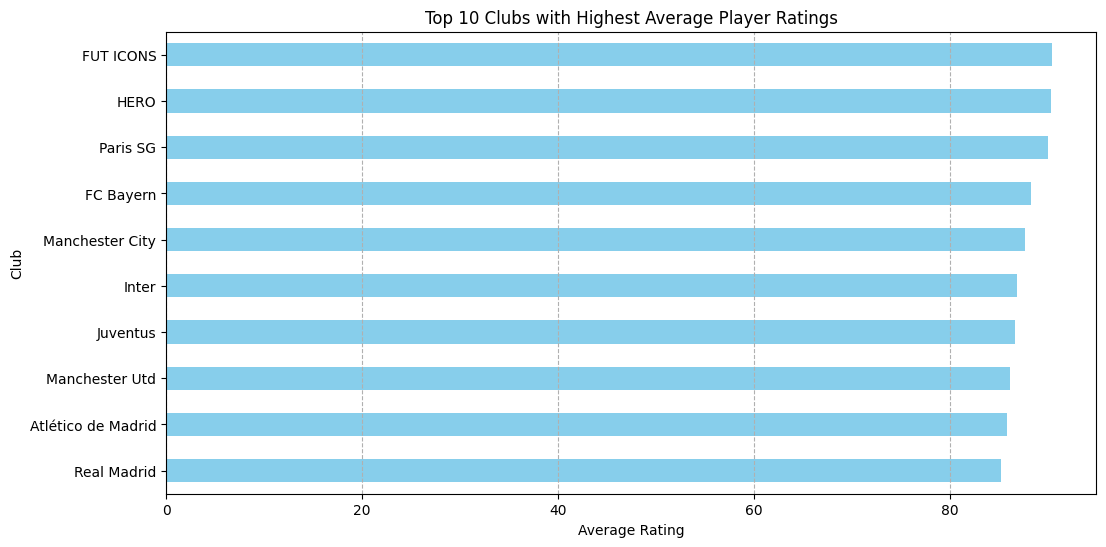

In [22]:
# "Which clubs have the highest average player ratings?"

# Calculating average ratings for each club
club_avg_ratings = players.groupby('Club')['Rating'].mean().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
club_avg_ratings.sort_values().plot(kind='barh', color='skyblue')
plt.title("Top 10 Clubs with Highest Average Player Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Club")
plt.grid(axis='x', linestyle='--')

plt.show()

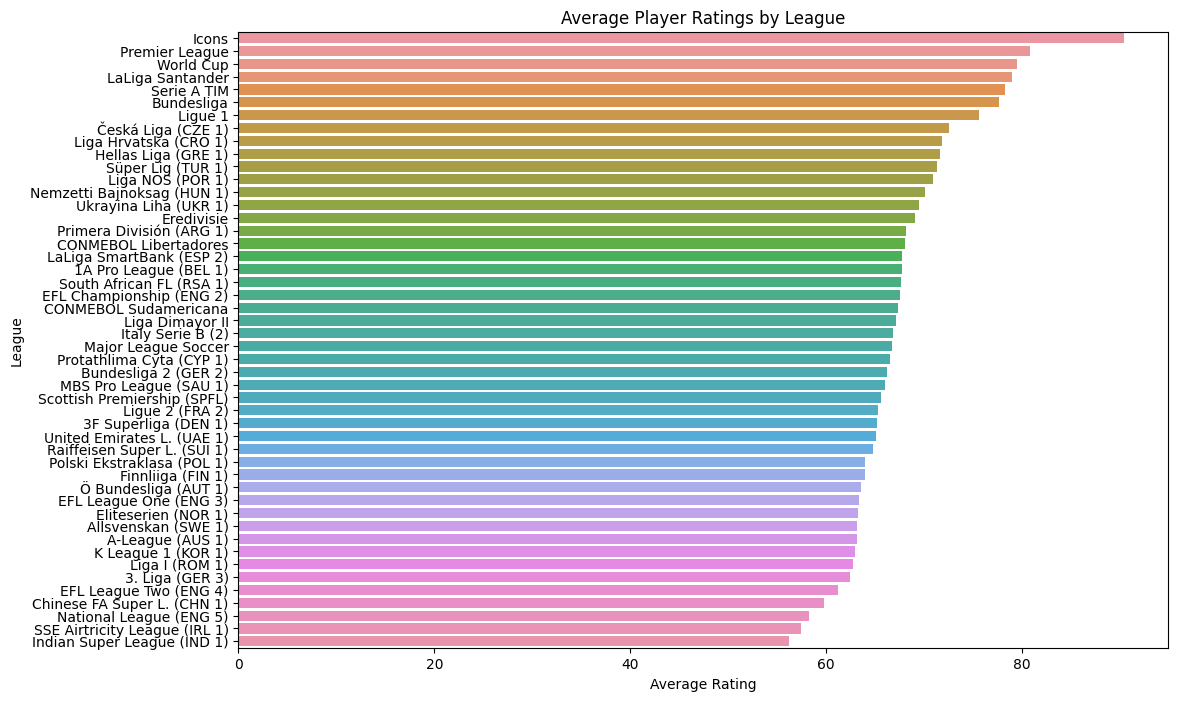

In [23]:
# Now create the bar plot of average player ratings by league
plt.figure(figsize=(12, 8))
avg_ratings_by_league = players.groupby('League')['Rating'].mean().sort_values(ascending=False)
sns.barplot(x=avg_ratings_by_league.values, y=avg_ratings_by_league.index)
plt.title('Average Player Ratings by League')
plt.xlabel('Average Rating')
plt.ylabel('League')
plt.show()

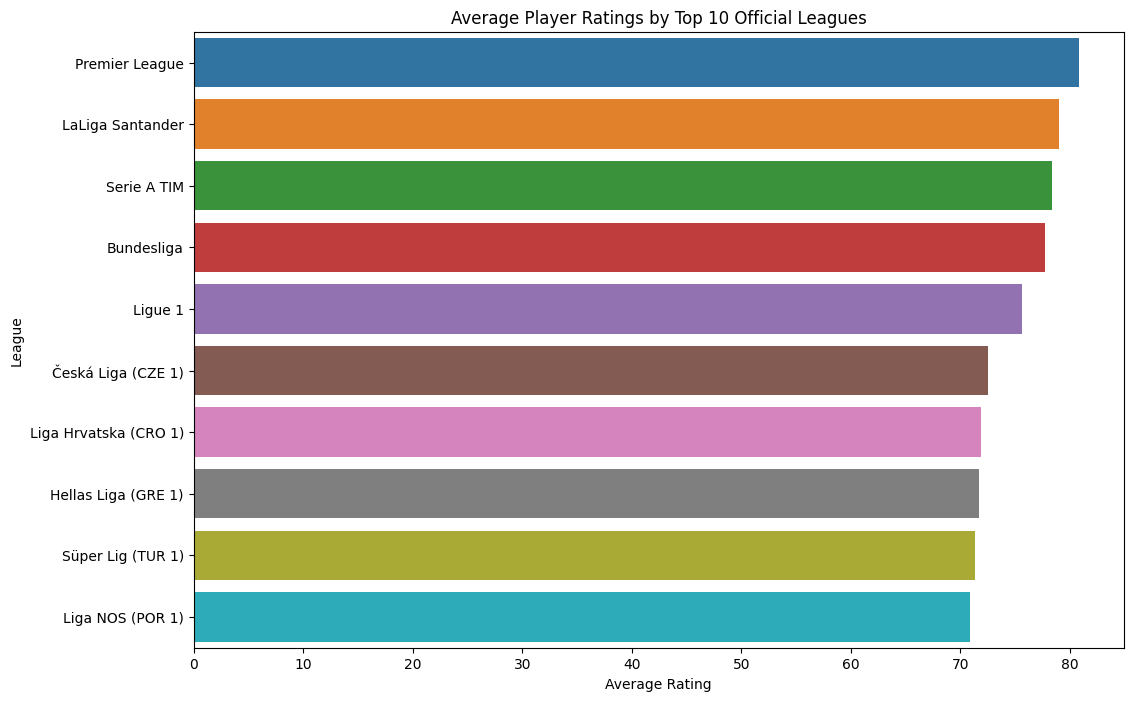

In [24]:
# Filter out the "Icons" and "World Cup" leagues and select only the top 10 official leagues
top_leagues = avg_ratings_by_league.drop(labels=['Icons', 'World Cup']).head(10)

# Create the bar plot for the top 10 official leagues
plt.figure(figsize=(12, 8))
sns.barplot(x=top_leagues.values, y=top_leagues.index)
plt.title('Average Player Ratings by Top 10 Official Leagues')
plt.xlabel('Average Rating')
plt.ylabel('League')
plt.show()

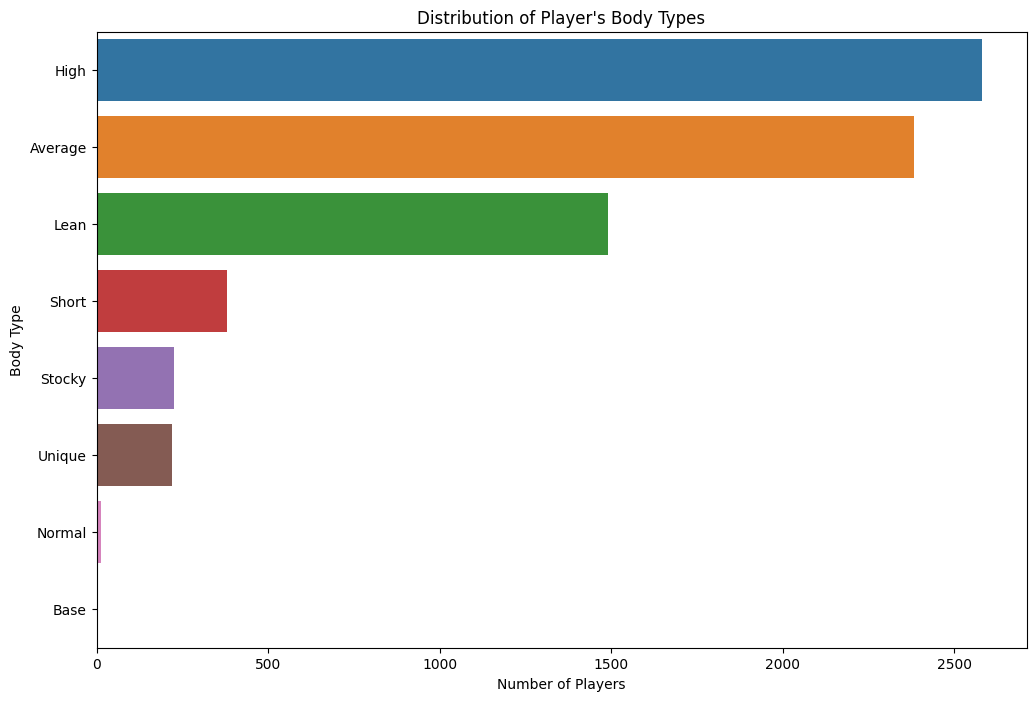

In [25]:
# Create a bar plot showing the counts of each body type
plt.figure(figsize=(12, 8))
bodytype_counts = players['BodyType'].value_counts()
sns.barplot(x=bodytype_counts.values, y=bodytype_counts.index)
plt.title('Distribution of Player\'s Body Types')
plt.xlabel('Number of Players')
plt.ylabel('Body Type')
plt.show()

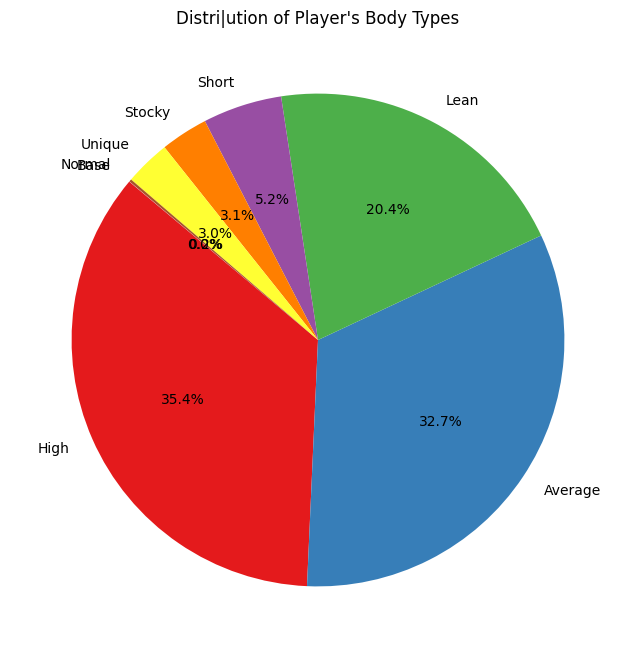

In [26]:
# Create a pie chart showing the distribution of each body type
plt.figure(figsize=(12, 8))
plt.pie(bodytype_counts.values, labels=bodytype_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set1"))
plt.title('Distri|ution of Player\'s Body Types')
plt.show()

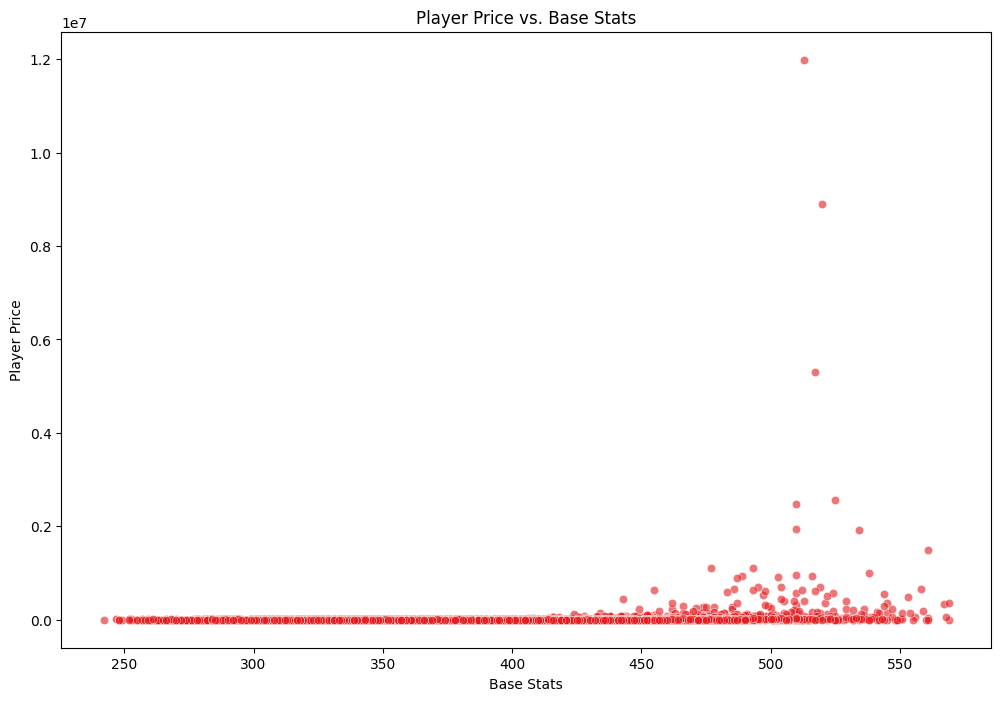

In [27]:
# Scatter plot of player price vs. base stats
plt.figure(figsize=(12, 8))
sns.scatterplot(x=players['Base_Stats'], y=players['Price'], color=sns.color_palette("Set1")[0], alpha=0.6)
plt.title('Player Price vs. Base Stats')
plt.xlabel('Base Stats')
plt.ylabel('Player Price')
plt.show()

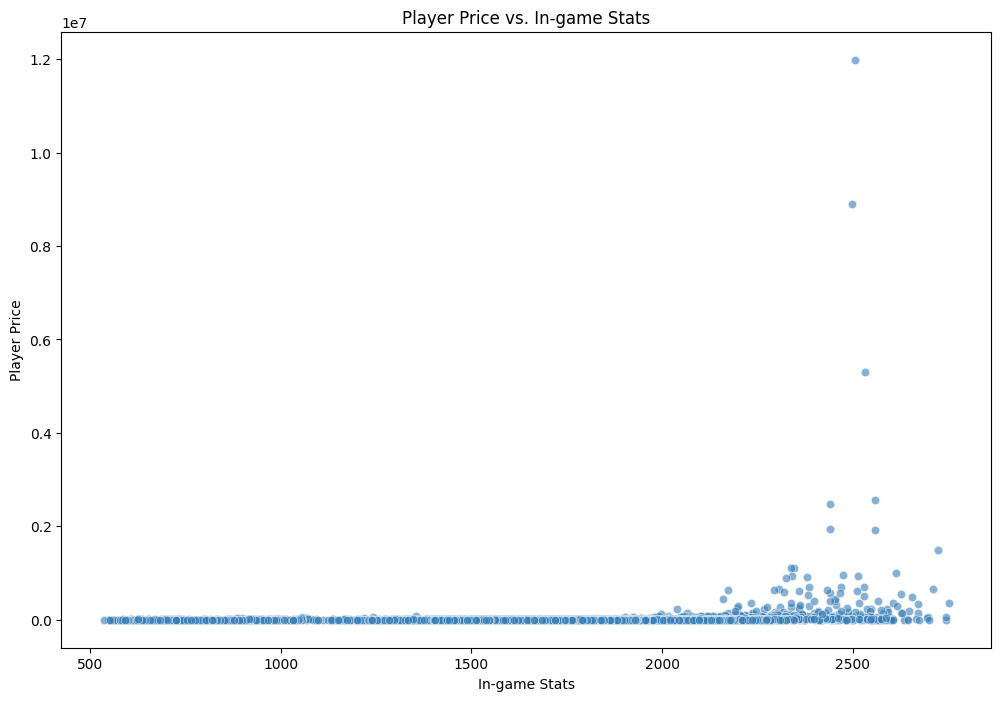

In [28]:
# Scatter plot of player price vs. in-game stats
plt.figure(figsize=(12, 8))
sns.scatterplot(x=players['Ingame_Stats'], y=players['Price'], color=sns.color_palette("Set1")[1], alpha=0.6)
plt.title('Player Price vs. In-game Stats')
plt.xlabel('In-game Stats')
plt.ylabel('Player Price')
plt.show()


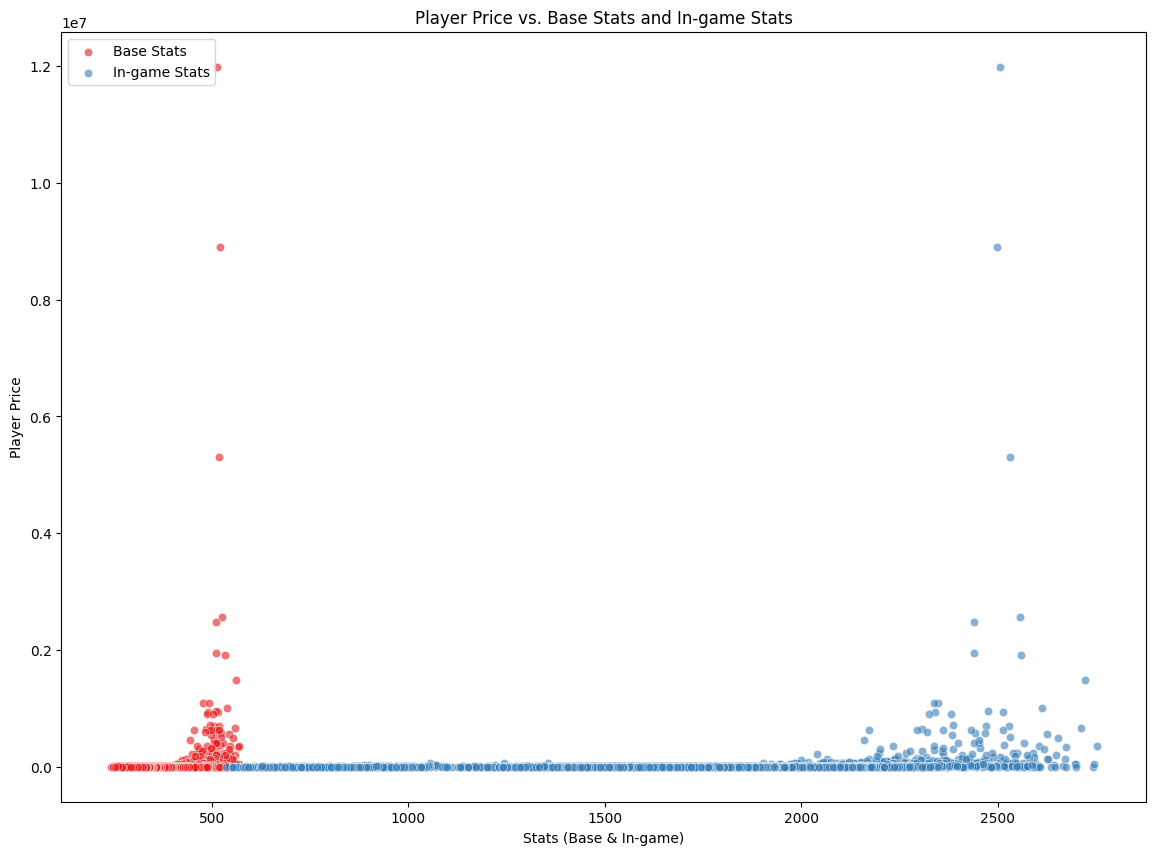

In [29]:
# Merged scatter plot of player price vs. base stats and in-game stats
plt.figure(figsize=(14, 10))
sns.scatterplot(x=players['Base_Stats'], y=players['Price'], color=sns.color_palette("Set1")[0], alpha=0.6, label='Base Stats')
sns.scatterplot(x=players['Ingame_Stats'], y=players['Price'], color=sns.color_palette("Set1")[1], alpha=0.6, label='In-game Stats')
plt.title('Player Price vs. Base Stats and In-game Stats')
plt.xlabel('Stats (Base & In-game)')
plt.ylabel('Player Price')
plt.legend(loc="upper left")
plt.show()


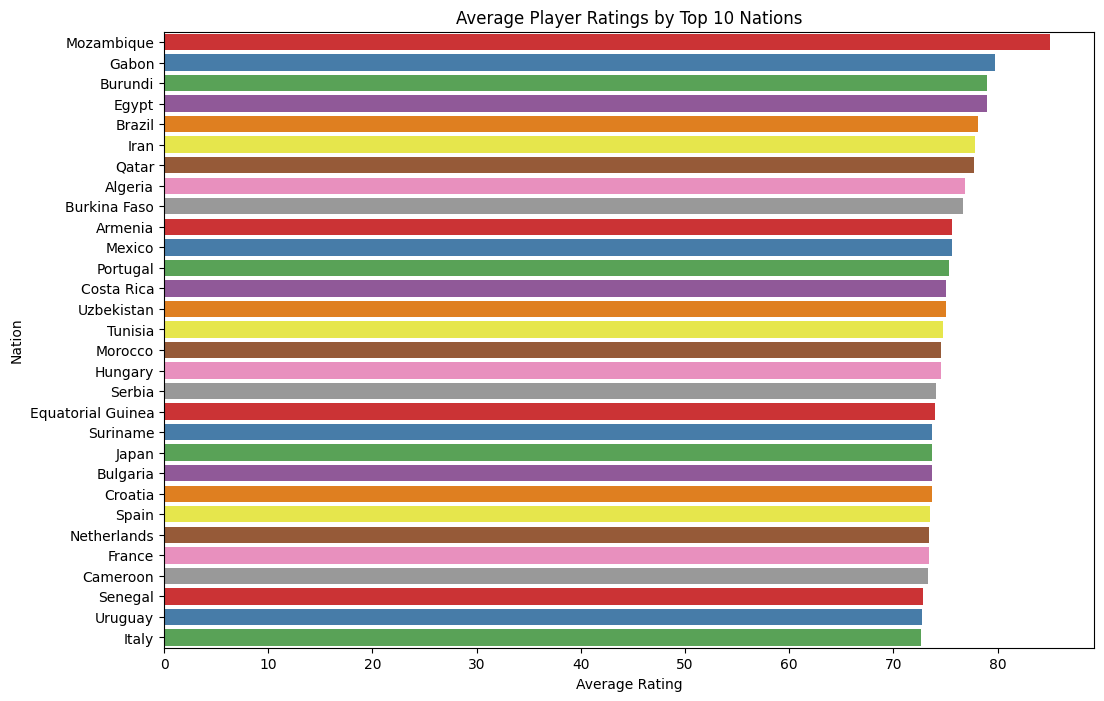

In [30]:
# Create a bar plot showing the average player ratings for the top 10 nations
plt.figure(figsize=(12, 8))
avg_ratings_by_nation = players.groupby('Nation')['Rating'].mean().sort_values(ascending=False).head(30)
sns.barplot(x=avg_ratings_by_nation.values, y=avg_ratings_by_nation.index, palette="Set1")
plt.title('Average Player Ratings by Top 10 Nations')
plt.xlabel('Average Rating')
plt.ylabel('Nation')
plt.show()


It's indeed surprising to see Mozambique at the top, especially when considering the traditional football powerhouses. One possible explanation could be that there are only a few players from Mozambique in the dataset, and they happen to have high ratings, which would skew the average upwards.

In [31]:
# Get the number of players from the top 10 nations
player_counts_by_nation = players[players['Nation'].isin(avg_ratings_by_nation.index)]['Nation'].value_counts()

player_counts_by_nation


France               438
Spain                416
Italy                259
Brazil               205
Netherlands          184
Portugal             176
Uruguay              107
Croatia               81
Senegal               68
Japan                 55
Serbia                54
Morocco               53
Mexico                45
Cameroon              43
Iran                  27
Algeria               23
Costa Rica            21
Tunisia               19
Hungary               13
Qatar                 10
Bulgaria              10
Suriname               7
Burkina Faso           6
Armenia                5
Gabon                  4
Egypt                  3
Equatorial Guinea      2
Mozambique             1
Burundi                1
Uzbekistan             1
Name: Nation, dtype: int64

The count of players from each of the top 10 nations provides valuable context:

Mozambique and Burundi each have only 1 player in the dataset. If that player has a high rating, it would lead to the nation having a high average rating.
Egypt, Gabon, Armenia, Burkina Faso, Qatar, and Algeria also have relatively small sample sizes, which can influence the average rating significantly.
Brazil, being a traditional football powerhouse, has 205 players, making its high average rating more robust and less influenced by outliers.
Given this, the high average rating for Mozambique can be attributed to the presence of just one highly-rated player. The small sample size for several nations in the top 10 is likely causing this unusual distribution.

Let's set a a threshold for the minimum number of players a nation must have to be considered in this analysis to 30.

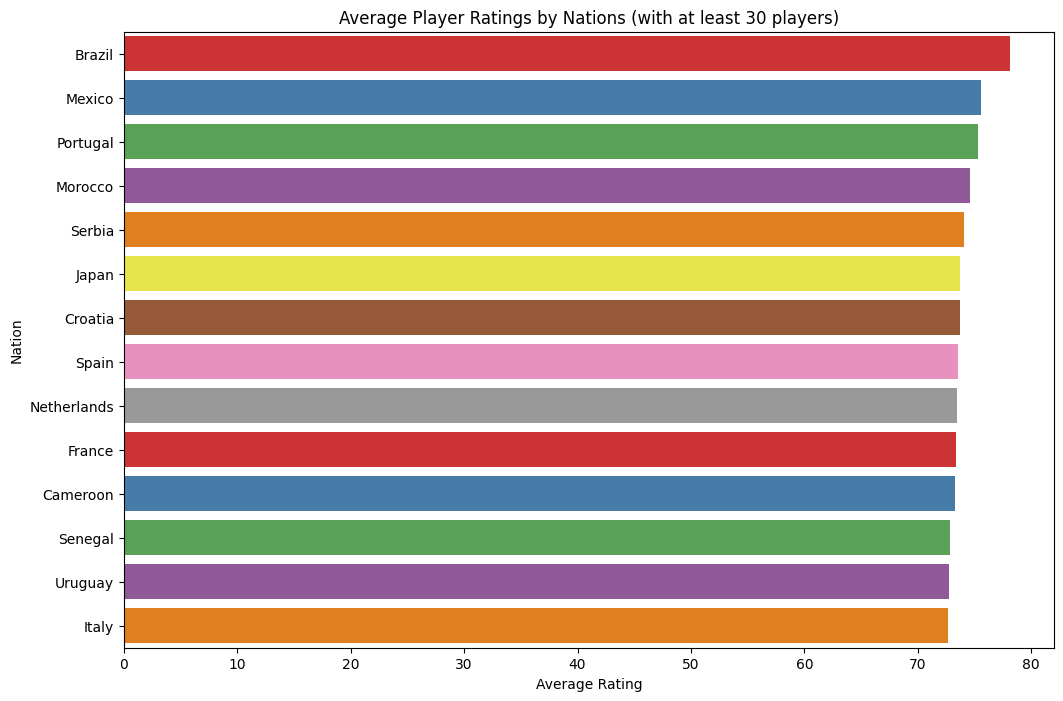

In [32]:
# Filter nations with at least 30 players
nations_with_min_30_players = player_counts_by_nation[player_counts_by_nation >= 30].index

# Calculate average ratings for these nations
avg_ratings_by_nation_30 = players[players['Nation'].isin(nations_with_min_30_players)].groupby('Nation')['Rating'].mean().sort_values(ascending=False)

# Create a bar plot showing the average player ratings for these nations
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_ratings_by_nation_30.values, y=avg_ratings_by_nation_30.index, palette="Set1")
plt.title('Average Player Ratings by Nations (with at least 30 players)')
plt.xlabel('Average Rating')
plt.ylabel('Nation')
plt.show()


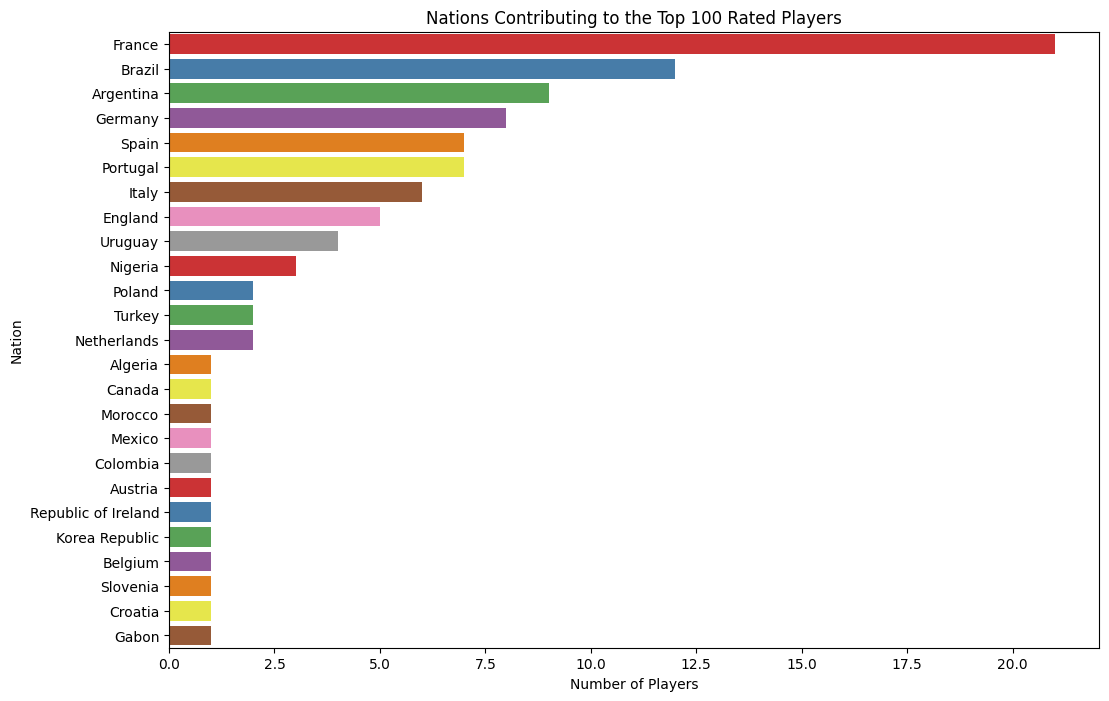

In [33]:
# Select the top 100 rated players
top_100_players = players.nlargest(100, 'Rating')

# Count the number of players from each nation within this subset
top_nations = top_100_players['Nation'].value_counts()

# Visualize the results using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_nations.values, y=top_nations.index, palette="Set1")
plt.title('Nations Contributing to the Top 100 Rated Players')
plt.xlabel('Number of Players')
plt.ylabel('Nation')
plt.show()


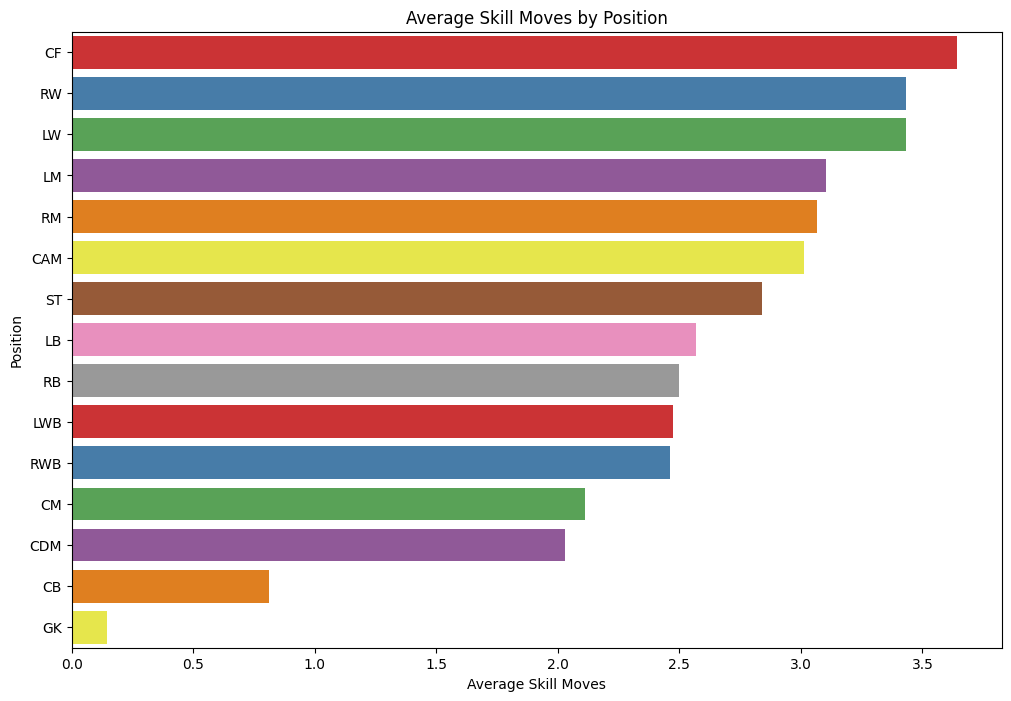

In [34]:
# Group the data by main positions and calculate the average number of skill moves
avg_skill_moves_by_position = players.groupby('Main_Position')['Skills_Star'].mean().sort_values(ascending=False)

# Visualize the results using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_skill_moves_by_position.values, y=avg_skill_moves_by_position.index, palette="Set1")
plt.title('Average Skill Moves by Position')
plt.xlabel('Average Skill Moves')
plt.ylabel('Position')
plt.show()


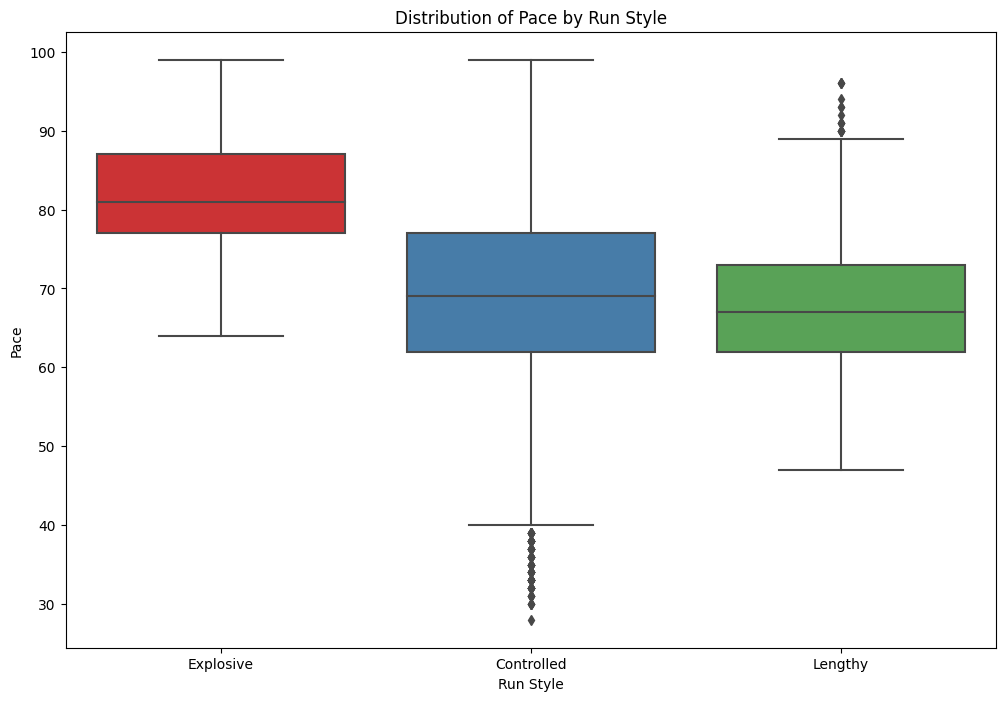

In [35]:
# Box plot of pace values for different run styles
plt.figure(figsize=(12, 8))
sns.boxplot(x=players['Run_Style'], y=players['Pace_Diving'], palette="Set1")
plt.title('Distribution of Pace by Run Style')
plt.xlabel('Run Style')
plt.ylabel('Pace')
plt.show()


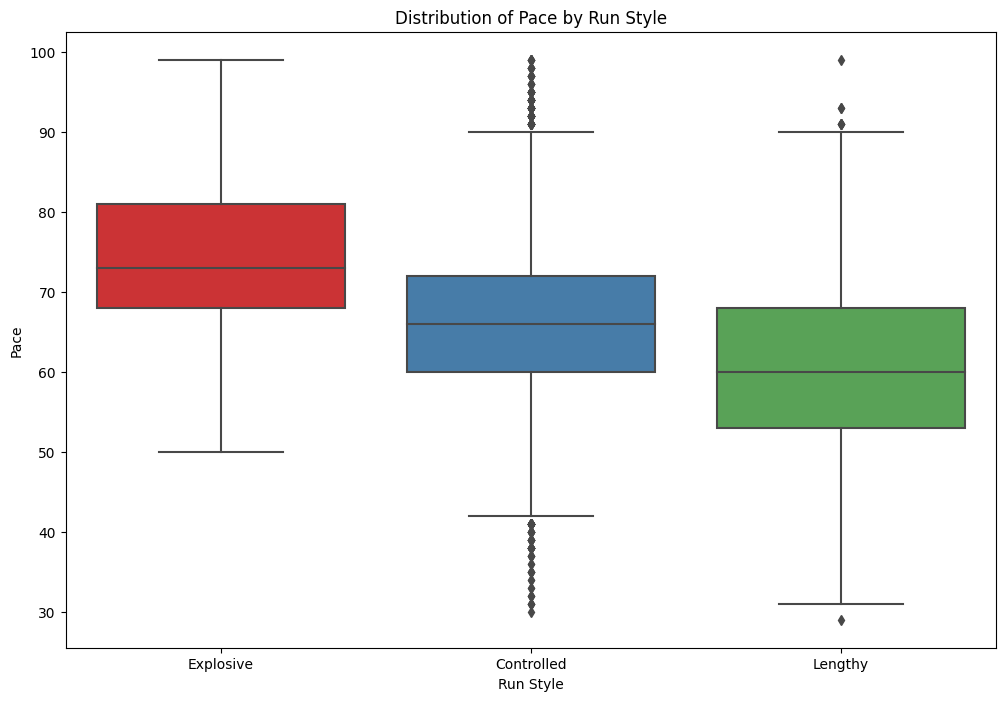

In [36]:
# Box plot of pace values for different run styles
plt.figure(figsize=(12, 8))
sns.boxplot(x=players['Run_Style'], y=players['Dribbling_Reflexes'], palette="Set1")
plt.title('Distribution of Pace by Run Style')
plt.xlabel('Run Style')
plt.ylabel('Pace')
plt.show()


#### Correlation

In [37]:
players.corr()

,Rating,Price,Price_Variation,Skills_Star,Weak_Foot_Star,Pace_Diving,Shooting_Handling,Passing_Kicking,Dribbling_Reflexes,Defense_Speed,Physical_Positioning,Popularity,Base_Stats,Ingame_Stats,Height_cm,Weight_kg
Rating,1.000000,0.155394,0.250688,0.428328,0.379427,0.504462,0.635559,0.823556,0.808025,0.412388,0.665215,0.365687,0.913886,0.647080,-0.010358,0.076909
Price,0.155394,1.000000,0.050482,0.100820,0.111081,0.107792,0.123006,0.136169,0.137286,0.011198,0.081951,0.123550,0.138806,0.111014,-0.027487,-0.017716
Price_Variation,0.250688,0.050482,1.000000,0.106202,0.111245,0.078137,0.152188,0.204499,0.190904,0.095814,0.146466,0.079013,0.206992,0.142974,-0.001597,0.034550
Skills_Star,0.428328,0.100820,0.106202,1.000000,0.389844,0.515031,0.505852,0.481913,0.576660,-0.040021,0.058791,0.217747,0.490476,0.671556,-0.416677,-0.330730
Weak_Foot_Star,0.379427,0.111081,0.111245,0.389844,1.000000,0.279958,0.374829,0.385609,0.401748,0.043109,0.166655,0.208274,0.388895,0.433592,-0.169208,-0.117485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Popularity,0.365687,0.123550,0.079013,0.217747,0.208274,0.256290,0.259824,0.320541,0.317293,0.119688,0.225143,1.000000,0.353606,0.267901,-0.017444,0.002915
Base_Stats,0.913886,0.138806,0.206992,0.490476,0.388895,0.628013,0.724568,0.909500,0.885714,0.422752,0.632838,0.353606,1.000000,0.678839,-0.118663,-0.026535
Ingame_Stats,0.647080,0.111014,0.142974,0.671556,0.433592,0.425516,0.381756,0.571156,0.541871,0.465949,0.417854,0.267901,0.678839,1.000000,-0.370021,-0.266394
Height_cm,-0.010358,-0.027487,-0.001597,-0.416677,-0.169208,-0.317700,-0.098083,-0.185201,-0.241412,0.017785,0.348435,-0.017444,-0.118663,-0.370021,1.000000,0.757053


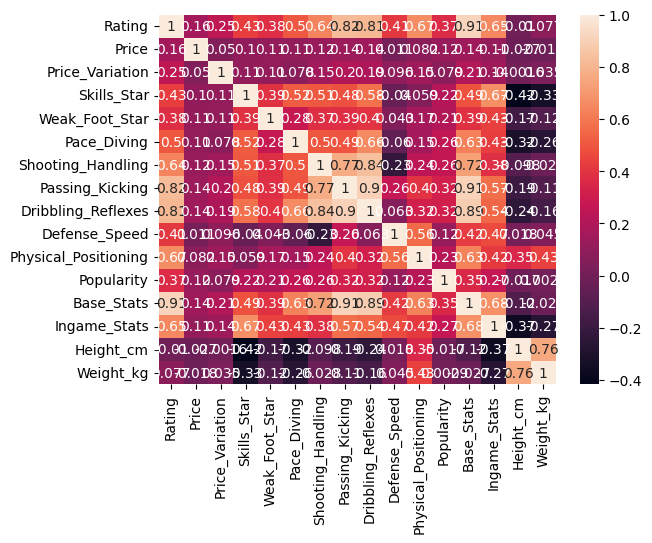

In [38]:
sns.heatmap(players.corr(), annot=True) 
plt.show()

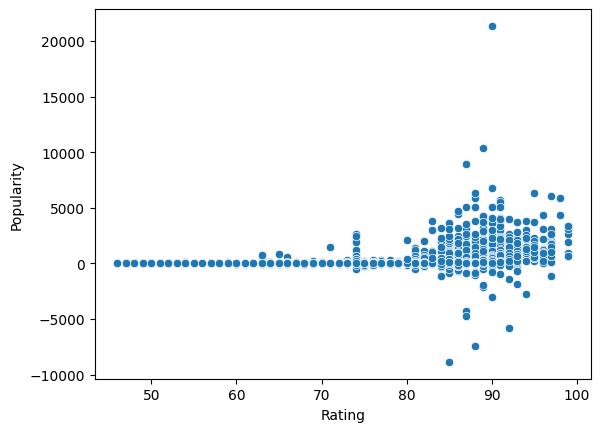

In [39]:
sns.scatterplot(data=players, x="Rating", y="Popularity") 
plt.show()

In [40]:
#sns.pairplot(data=players) 
#plt.show()

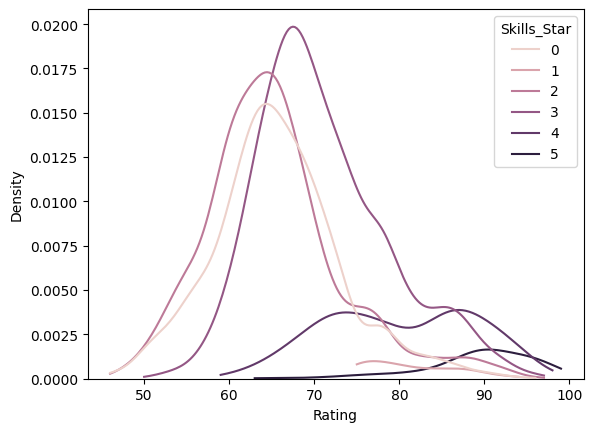

In [41]:
sns.kdeplot(data=players, x="Rating", hue="Skills_Star", cut=0)

plt.show()

## 5. Feature Engineering:

- Derive new features if necessary.
- Encode categorical features for modeling.
- Normalize/standardize numerical features if needed.

## 7. Modeling:

- Choose appropriate models based on the type of questions and nature of data. For instance:
- Regression models for predicting player price.
- Classification models for predicting card version.
- Split the data into training and test sets.
- Train the model on the training data and evaluate its performance on the test set.

## 8. Model Evaluation:

- Use appropriate metrics for evaluation, like:
- RMSE for regression problems.
- Accuracy, precision, recall, etc., for classification problems.
- Adjust model parameters or try different models if necessary.


## 9. Interpretation and Reporting:

- Answer the hypothetical questions based on model results and data analysis.
- Provide recommendations or insights that can be useful for players, clubs, or businesses associated with FIFA Ultimate Team.


## 10. Deployment (Optional):
If required, create an interactive tool or dashboard that allows users to input player attributes and get predictions or insights.